In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Siemens/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Siemens/test.csv')

# Preprocessing

In [ ]:
df.head()

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id
0,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1
1,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1
2,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1
3,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1
4,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1


In [ ]:
df_test.head()

,time,Gb(i),Gd(i),H_sun,T2m,WS10m,dataset_id
0,2018-03-26 00:00:00,0.0,0.0,0.0,1.76,1.52,1
1,2018-03-26 00:15:00,0.0,0.0,0.0,1.57,1.52,1
2,2018-03-26 00:30:00,0.0,0.0,0.0,1.38,1.52,1
3,2018-03-26 00:45:00,0.0,0.0,0.0,1.19,1.52,1
4,2018-03-26 01:00:00,0.0,0.0,0.0,1.00,1.52,1


In [ ]:
!pip install feature_engine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import DropMissingData
from feature_engine.selection import DropFeatures
from feature_engine.timeseries.forecasting import (
    LagFeatures,
)
from sklearn.impute import SimpleImputer

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.set_index(df['time'], inplace=True)

df_test['time'] = pd.to_datetime(df_test['time'])
df_test.set_index(df_test['time'], inplace=True)

In [ ]:
df.sort_index(inplace=True)

df_test.sort_index(inplace=True)

In [ ]:
df.isnull().sum()

time             0
P                0
Gb(i)            0
Gd(i)            0
H_sun            0
T2m              0
WS10m            0
load             0
residual_load    0
dataset_id       0
dtype: int64

In [ ]:
df.head(5)

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id
time,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1
2018-01-01 00:15:00,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1
2018-01-01 00:30:00,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1
2018-01-01 00:45:00,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1
2018-01-01 01:00:00,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1


# EDA

In [ ]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88712 entries, 2018-01-01 00:00:00 to 2020-10-10 23:45:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           88712 non-null  datetime64[ns]
 1   P              88712 non-null  float64       
 2   Gb(i)          88712 non-null  float64       
 3   Gd(i)          88712 non-null  float64       
 4   H_sun          88712 non-null  float64       
 5   T2m            88712 non-null  float64       
 6   WS10m          88712 non-null  float64       
 7   load           88712 non-null  float64       
 8   residual_load  88712 non-null  float64       
 9   dataset_id     88712 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 7.4 MB
None


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                time             P         Gb(i)  \
count                          88712  88712.000000  88712.000000   
mean   2019-05-22 23:49:16.105148928     98.887196     83.852409   
min              2018-01-01 00:00:00      0.000000      0.000000   
25%              2018-09-07 00:26:15      0.000000      0.000000   
50%              2019-05-22 23:52:30      2.070000      0.000000   
75%              2020-02-04 23:18:45    146.150000     58.102500   
max              2020-10-10 23:45:00    664.030000    964.890000   
std                              NaN    156.181994    174.693658   

              Gd(i)         H_sun           T2m         WS10m          load  \
count  88712.000000  88712.000000  88712.000000  88712.000000  88712.000000   
mean      67.647893     13.390366     10.572120      2.654056    150.889231   
min        0.000000      0.000000    -11.250000      0.000000      0.000000   
25%        0.000000      0.000000      4.090000   

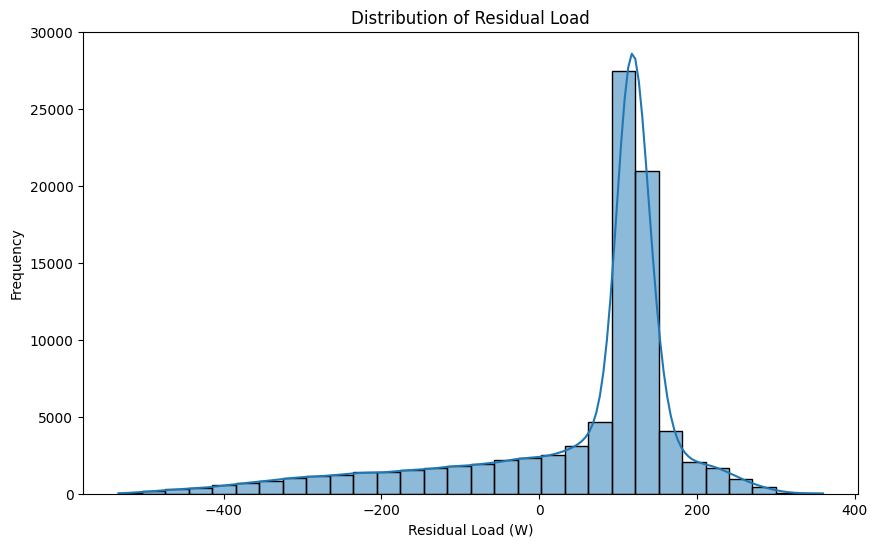

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['residual_load'], bins=30, kde=True)
plt.title('Distribution of Residual Load')
plt.xlabel('Residual Load (W)')
plt.ylabel('Frequency')
plt.show()

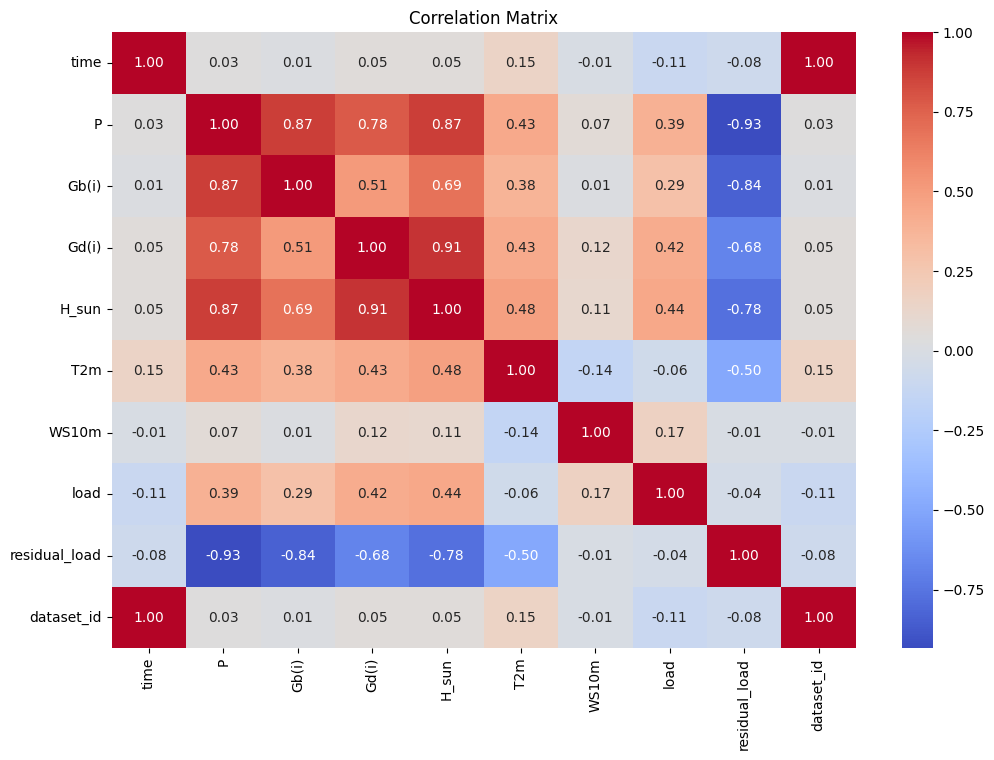

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

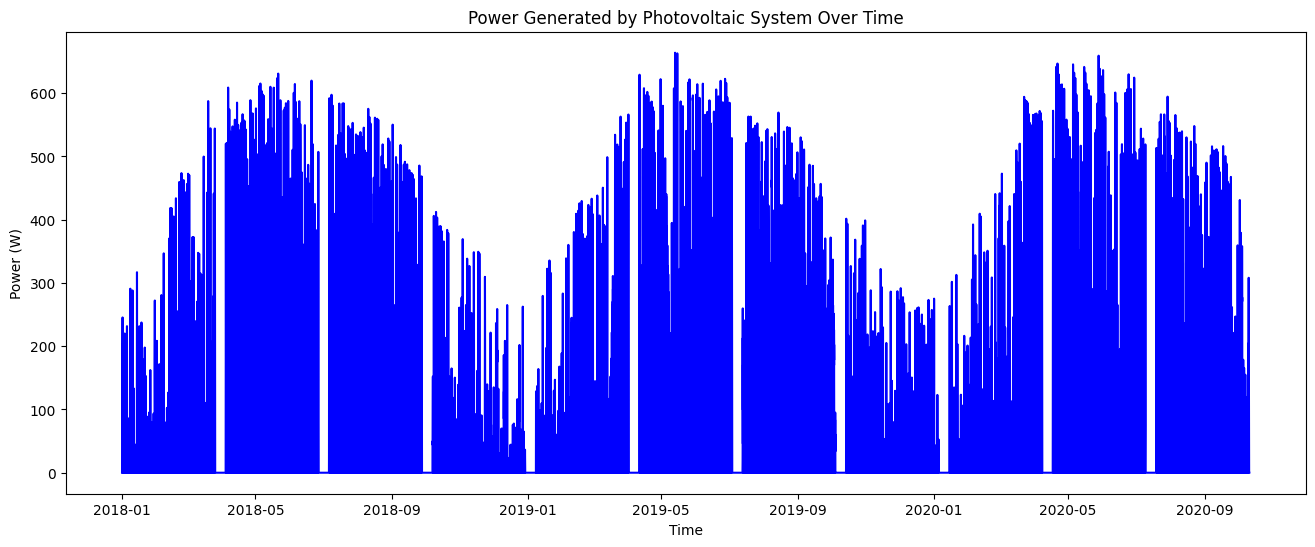

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['P'], color='blue')
plt.title('Power Generated by Photovoltaic System Over Time')
plt.xlabel('Time')
plt.ylabel('Power (W)')
plt.show()

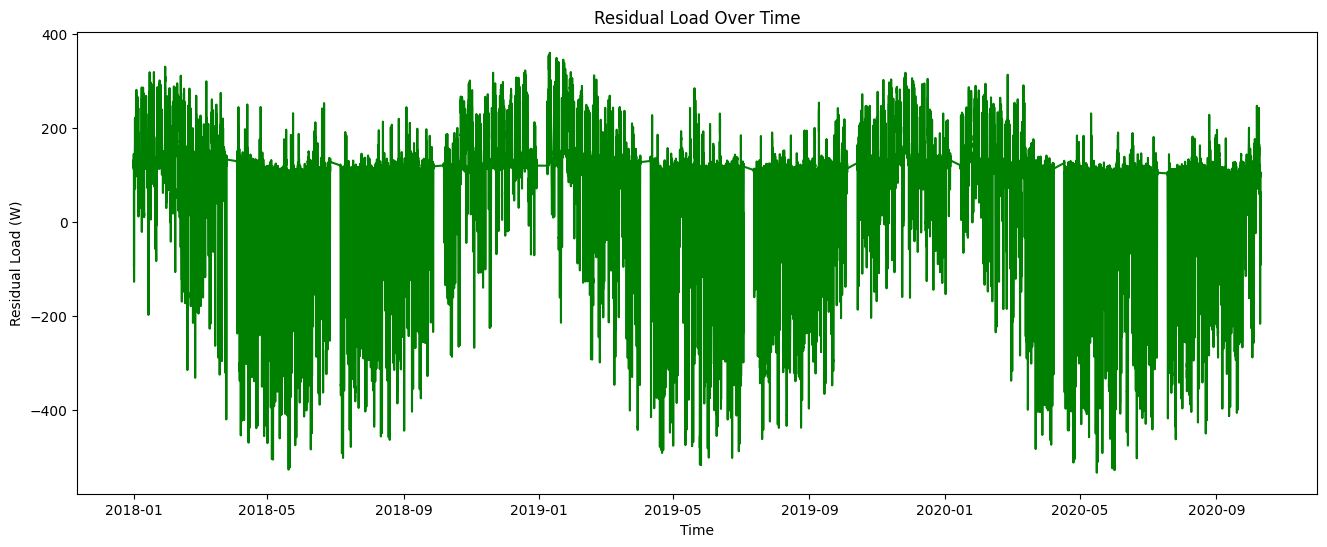

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['residual_load'], color='green')
plt.title('Residual Load Over Time')
plt.xlabel('Time')
plt.ylabel('Residual Load (W)')
plt.show()

# Feature Engineering

time features

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['day_of_week'] = df.index.dayofweek

In [ ]:
df_test['year'] = df_test.index.year
df_test['month'] = df_test.index.month
df_test['day'] = df_test.index.day
df_test['hour'] = df_test.index.hour
df_test['minute'] = df_test.index.minute
df_test['day_of_week'] = df_test.index.dayofweek

lag features

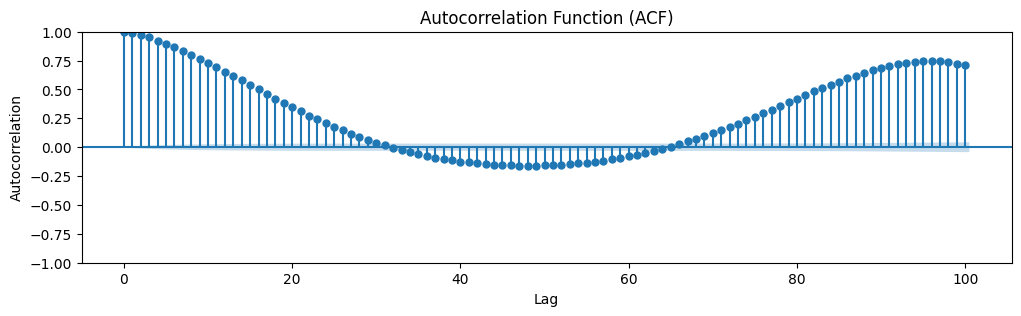

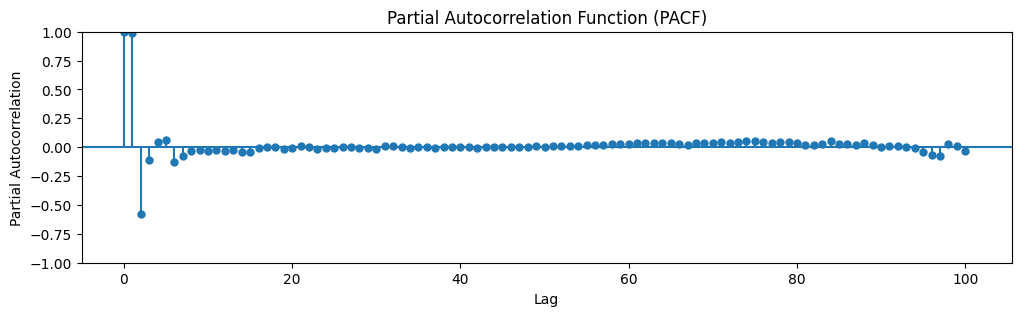

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 3))
plot_acf(df['residual_load'], lags=100, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 3))
plot_pacf(df['residual_load'], lags=100, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
lags = [1, 2, 48]
for lag in lags:
    for column in ['Gb(i)', 'Gd(i)', 'T2m', 'WS10m']:
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)

In [ ]:
lags = [1, 2, 48]
for lag in lags:
    for column in ['Gb(i)', 'Gd(i)', 'T2m', 'WS10m']:
        df_test[f'{column}_lag_{lag}'] = df_test[column].shift(lag)

interaction features

In [ ]:
df['Gb_H_sun_interaction'] = df['Gb(i)'] * df['H_sun']
df['Gd_H_sun_interaction'] = df['Gd(i)'] * df['H_sun']

In [ ]:
df_test['Gb_H_sun_interaction'] = df_test['Gb(i)'] * df_test['H_sun']
df_test['Gd_H_sun_interaction'] = df_test['Gd(i)'] * df_test['H_sun']

In [ ]:
df.dropna(inplace=True)

In [ ]:
df_test.dropna(inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88664 entries, 2018-01-01 12:00:00 to 2020-10-10 23:45:00
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  88664 non-null  datetime64[ns]
 1   P                     88664 non-null  float64       
 2   Gb(i)                 88664 non-null  float64       
 3   Gd(i)                 88664 non-null  float64       
 4   H_sun                 88664 non-null  float64       
 5   T2m                   88664 non-null  float64       
 6   WS10m                 88664 non-null  float64       
 7   load                  88664 non-null  float64       
 8   residual_load         88664 non-null  float64       
 9   dataset_id            88664 non-null  int64         
 10  year                  88664 non-null  int32         
 11  month                 88664 non-null  int32         
 12  day                   88664 non-null  i

In [ ]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7344 entries, 2018-03-26 12:00:00 to 2020-10-17 23:45:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  7344 non-null   datetime64[ns]
 1   Gb(i)                 7344 non-null   float64       
 2   Gd(i)                 7344 non-null   float64       
 3   H_sun                 7344 non-null   float64       
 4   T2m                   7344 non-null   float64       
 5   WS10m                 7344 non-null   float64       
 6   dataset_id            7344 non-null   int64         
 7   year                  7344 non-null   int32         
 8   month                 7344 non-null   int32         
 9   day                   7344 non-null   int32         
 10  hour                  7344 non-null   int32         
 11  minute                7344 non-null   int32         
 12  day_of_week           7344 non-null   in

# Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df_features = df.drop(columns=['time', 'P', 'Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'load', 'dataset_id'])

In [ ]:
X = df_features.drop(columns=['residual_load'])
y = df[['P', 'load', 'residual_load']]

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
rfecv = RFECV(estimator=xgb_model, cv=tscv, scoring='neg_mean_squared_error')
rfecv.fit(X, y)

RFECV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, gamma=None, grow_policy=None,
                             importance...ne, interaction_constraints=None,
                             learning_rate=None, max_bin=None,
                             max_cat_threshold=None, max_cat_to_onehot=None,
                             max_delta_step=None, max_depth=None,
                             max_leaves=None, min_child_weight=None,
                             missing=nan, monotone_constraints=None,
                             multi_strategy=None, n_estimators=None,
                             n_jobs=None, num_parallel_tree=None,
                             random_state=None, ...),
      scoring='neg_mean_squared_error')

In [ ]:
selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['month', 'day', 'hour', 'day_of_week', 'Gb(i)_lag_1', 'Gd(i)_lag_1',
       'T2m_lag_1', 'Gb(i)_lag_2', 'Gd(i)_lag_2', 'T2m_lag_2', 'Gd(i)_lag_48',
       'T2m_lag_48', 'Gb_H_sun_interaction', 'Gd_H_sun_interaction'],
      dtype='object')


In [ ]:
X_selected = rfecv.transform(X)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7344 entries, 2018-03-26 12:00:00 to 2020-10-17 23:45:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  7344 non-null   datetime64[ns]
 1   Gb(i)                 7344 non-null   float64       
 2   Gd(i)                 7344 non-null   float64       
 3   H_sun                 7344 non-null   float64       
 4   T2m                   7344 non-null   float64       
 5   WS10m                 7344 non-null   float64       
 6   dataset_id            7344 non-null   int64         
 7   year                  7344 non-null   int32         
 8   month                 7344 non-null   int32         
 9   day                   7344 non-null   int32         
 10  hour                  7344 non-null   int32         
 11  minute                7344 non-null   int32         
 12  day_of_week           7344 non-null   in

# XGBoost

In [ ]:
df_train = df.drop(columns=['time'])

In [ ]:
df_test = df_test.drop(columns=['time'])

In [ ]:
X_train = df_train.drop(columns=['P', 'load', 'residual_load'])
y_train = df_train[['P', 'load', 'residual_load']]

In [ ]:
X_train.columns

Index(['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'dataset_id', 'year',
       'month', 'day', 'hour', 'minute', 'day_of_week', 'Gb(i)_lag_1',
       'Gd(i)_lag_1', 'T2m_lag_1', 'WS10m_lag_1', 'Gb(i)_lag_2', 'Gd(i)_lag_2',
       'T2m_lag_2', 'WS10m_lag_2', 'Gb(i)_lag_48', 'Gd(i)_lag_48',
       'T2m_lag_48', 'WS10m_lag_48', 'Gb_H_sun_interaction',
       'Gd_H_sun_interaction'],
      dtype='object')

In [ ]:
X_train = X_train.drop(columns=['year','minute', 'WS10m_lag_1', 'WS10m_lag_2', 'Gb(i)_lag_48', 'WS10m_lag_48'])

In [ ]:
X_train.columns

Index(['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'dataset_id', 'month', 'day',
       'hour', 'day_of_week', 'Gb(i)_lag_1', 'Gd(i)_lag_1', 'T2m_lag_1',
       'Gb(i)_lag_2', 'Gd(i)_lag_2', 'T2m_lag_2', 'Gd(i)_lag_48', 'T2m_lag_48',
       'Gb_H_sun_interaction', 'Gd_H_sun_interaction'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'dataset_id', 'year',
       'month', 'day', 'hour', 'minute', 'day_of_week', 'Gb(i)_lag_1',
       'Gd(i)_lag_1', 'T2m_lag_1', 'WS10m_lag_1', 'Gb(i)_lag_2', 'Gd(i)_lag_2',
       'T2m_lag_2', 'WS10m_lag_2', 'Gb(i)_lag_48', 'Gd(i)_lag_48',
       'T2m_lag_48', 'WS10m_lag_48', 'Gb_H_sun_interaction',
       'Gd_H_sun_interaction'],
      dtype='object')

In [ ]:
df_test = df_test.drop(columns=['year','minute', 'WS10m_lag_1', 'WS10m_lag_2', 'Gb(i)_lag_48', 'WS10m_lag_48'])

In [ ]:
df_test.columns

Index(['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'dataset_id', 'month', 'day',
       'hour', 'day_of_week', 'Gb(i)_lag_1', 'Gd(i)_lag_1', 'T2m_lag_1',
       'Gb(i)_lag_2', 'Gd(i)_lag_2', 'T2m_lag_2', 'Gd(i)_lag_48', 'T2m_lag_48',
       'Gb_H_sun_interaction', 'Gd_H_sun_interaction'],
      dtype='object')

In [ ]:
xgb_model = XGBRegressor(max_depth=5, subsample=0.5)

In [ ]:
xgb_model.fit(X_train, y_train, eval_metric='rmse')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(df_test)

# RMSE on Validation Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()

xgb_model.fit(X_train_split, y_train_split)

y_pred_val = xgb_model.predict(X_val)

In [ ]:
y_pred_val = pd.DataFrame(y_pred_val, columns=['P', 'load', 'residual_load'])

In [ ]:
y_pred_val['residual_load'] = y_pred_val['load'] - y_pred_val['P']

In [ ]:
val_rmse = mean_squared_error(y_val.load, y_pred_val.load, squared=False)
print("Validation RMSE (load):", val_rmse)

Validation RMSE (load): 14.318006436591265


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
val_rmse = mean_squared_error(y_val.P, y_pred_val.P, squared=False)
print("Validation RMSE (P):", val_rmse)

Validation RMSE (P): 32.86410434190227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
val_rmse = mean_squared_error(y_val.residual_load, y_pred_val.residual_load, squared=False)
print("Validation RMSE (residual_load):", val_rmse)

Validation RMSE (residual_load): 35.73693771111356


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Result

In [ ]:
df_pred = pd.DataFrame(y_pred, columns=['P', 'load', 'residual_load'])

In [ ]:
df_pred.head()

,P,load,residual_load
0,216.320923,266.669281,33.699085
1,207.555267,266.669281,78.343887
2,202.223129,266.611908,71.271255
3,161.166092,262.355011,92.229019
4,160.084869,263.393250,106.567543


In [ ]:
df_pred['residual_load'] = df_pred['load'] - df_pred['P']

In [ ]:
df_pred.head()

,P,load,residual_load
0,216.320923,266.669281,50.348358
1,207.555267,266.669281,59.114014
2,202.223129,266.611908,64.388779
3,161.166092,262.355011,101.188919
4,160.084869,263.393250,103.308380


In [ ]:
df_pred.shape

(7344, 3)

In [ ]:
df_test_copy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Siemens/test.csv')

In [ ]:
df_pred['time'] = df_test_copy['time']

In [ ]:
df_pred['time'] = pd.to_datetime(df_pred['time'])
df_pred.set_index(df_pred['time'], inplace=True)

In [ ]:
df_pred.head()

,P,load,residual_load,time
time,,,,
2018-03-26 00:00:00,216.320923,266.669281,50.348358,2018-03-26 00:00:00
2018-03-26 00:15:00,207.555267,266.669281,59.114014,2018-03-26 00:15:00
2018-03-26 00:30:00,202.223129,266.611908,64.388779,2018-03-26 00:30:00
2018-03-26 00:45:00,161.166092,262.355011,101.188919,2018-03-26 00:45:00
2018-03-26 01:00:00,160.084869,263.393250,103.308380,2018-03-26 01:00:00


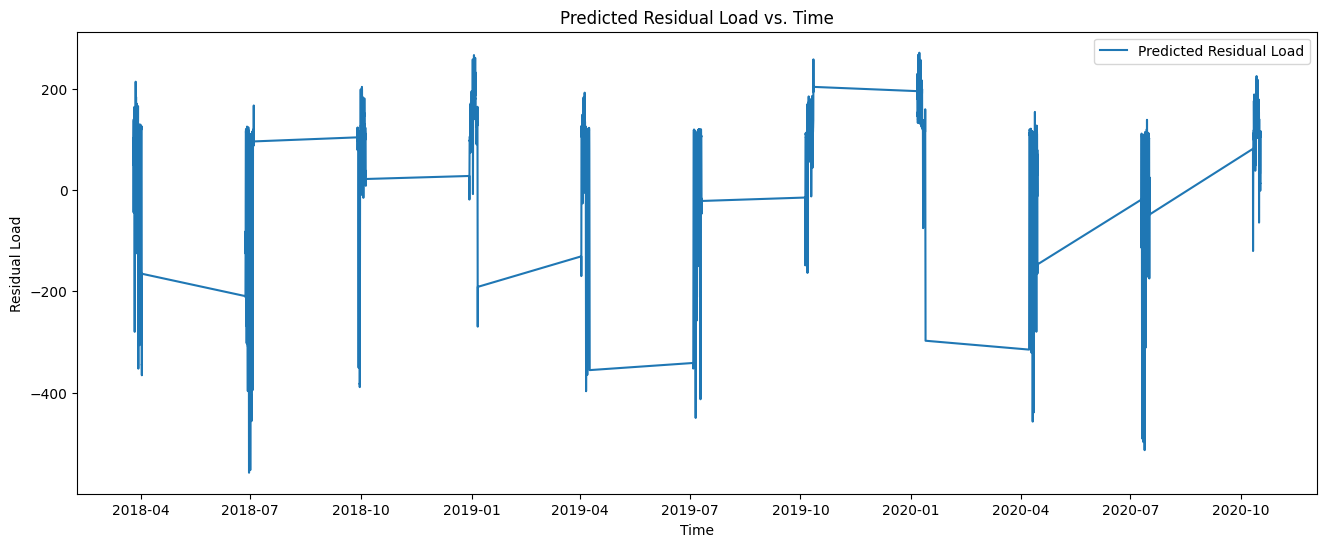

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(df_pred.index, df_pred['residual_load'], label='Predicted Residual Load')
plt.xlabel('Time')
plt.ylabel('Residual Load')
plt.title('Predicted Residual Load vs. Time')
plt.legend()
plt.show()